For energies below 5 keV, https://xdb.lbl.gov/Section3/Sec_3-2.pdf gives the CSDA range of electrons in a solid, where the Bethe-Bloch energy loss is inadequate. Thus we want to find the range of higher energy deltas using the Bethe-Bloch formula, which should add on top of the CSDA range.

In [1]:
import numpy as np
from scipy.integrate import quad
import matplotlib.pyplot as plt

Grupen <i>Particle Detectors</i> gives a Bethe-Bloch approximation for electrons (1.28):

$-\frac{dE}{dx}=2\kappa [\ln{\frac{\gamma m_e c^2 \beta \sqrt{\gamma -1}}{\sqrt{2}I}} + \frac{1}{2}(1-\beta^2) - \frac{2\gamma-1}{2\gamma^2}\ln{2} + \frac{1}{16}(\frac{\gamma-1}{\gamma})^2]$

$\kappa = 2\pi N_A r_e^2 m_e c^2 \frac{Z}{A} \beta^{-2} = 0.076769 \beta^{-2}\ \rm{MeV\ g^{-1}\ cm^2}$ in Si, or

$\kappa = 0.17887 \beta^{-2}\ \rm{MeV\ cm^{-1}}$ in length units (in Si).

$I_{Si} \approx 170\ \rm{eV}$

$E = (\gamma-1) m_e c^2$, and $\gamma = \frac{1}{\sqrt{1-\beta^2}}$ as usual,

$\therefore$

$-\frac{dE}{dx} = 0.35774 \beta^{-2} [\ln{\frac{\gamma m_e c^2 \beta \sqrt{\gamma -1}}{0.00024}} + \frac{1}{2}(1-\beta^2) - \frac{2\gamma-1}{2\gamma^2}\ln{2} + \frac{1}{16}(\frac{\gamma-1}{\gamma})^2]\ \rm{MeV\ cm^{-1}}$, where

$\gamma = \frac{E}{m_e c^2}+1$, $\beta = \sqrt{1 - \frac{1}{\gamma^2}}$, and $m_e c^2 \approx 0.511\ \rm{MeV}$.

Write this as $-\frac{dE}{dx} = S_{BB}(E)$, then

$R_{BB}(E) = \int_{10\rm{keV}}^{E} \frac{dE'}{S_{BB}(E')}$

In [2]:
def stop(E):
    '''
    Stopping power dE/dx, in MeV/um
    '''
    mec2 = 0.511
    gamma = E/mec2 + 1
    beta = np.sqrt(1 - (1/gamma**2))
    
    term1 = np.log((E * beta * np.sqrt(gamma-1)) / 0.00024)
    term2 = 0.5 * (1 - beta**2)
    term3 = (2*gamma - 1) / (2*gamma**2) * np.log(2)
    term4 = 1/16 * ((gamma-1)/gamma)**2
    
    return 0.35774 / beta**2 * (term1+term2-term3+term4) /1e4

Text(0, 0.5, '-dE/dx (MeV/um)')

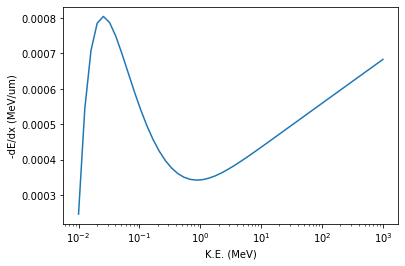

In [3]:
ens = np.logspace(-2,3)
plt.plot(ens,stop(ens))
plt.xscale('log')
plt.xlabel('K.E. (MeV)')
plt.ylabel('-dE/dx (MeV/um)')

In [4]:
def R_BB(E):
    return quad(lambda x: 1/stop(x), 0.01, E, limit=100)[0]

assume CSDA range at 10 keV is 1 um

Text(0.5, 1.0, 'Delta-electron range')

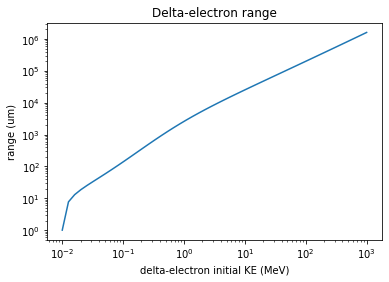

In [5]:
plt.plot(ens,[R_BB(en)+1 for en in ens])
plt.xscale('log')
plt.yscale('log')
plt.xlabel('delta-electron initial KE (MeV)')
plt.ylabel('range (um)')
plt.title('Delta-electron range')

Maximum transferable kinetic energy, $W_{max}$, for a proton with $\beta=0.5$ is about 0.5 MeV.

For delta electrons with KE between $T_{low}$ and $W_{max}$,

$\frac{dN}{dx} = \frac{0.178872}{10^4\ \beta^2} (\frac{1}{T_{low}} - \frac{1}{W_{max}})\ \rm{\mu m^{-1}}$ (from integrating PDG Eq. 34.9 wrt T, assuming F=1)

<sub>F&lt;1 for T near W_max, so this is an upper limit for the number of deltas expected</sub>

How many deltas do we expect a proton to produce which travel more than 1 micron?

Such deltas will have energies between 10 keV and 500 keV

In [13]:
beta = 0.5

perum = 0.178872/(1e4 * beta**2) * (1/0.01 - 1/0.5)

print('A 0.5c proton produces', perum, 'deltas per micron, or 1 every', 1/perum, 'microns')

A 0.5c proton produces 0.0070117824 deltas per micron, or 1 every 142.61708977163923 microns


"δ rays of even modest energy are rare. For a β ≈ 1 particle, for example, on average only one
collision with T_e > 10 keV will occur along a path length of 90 cm of argon gas" (PDG)

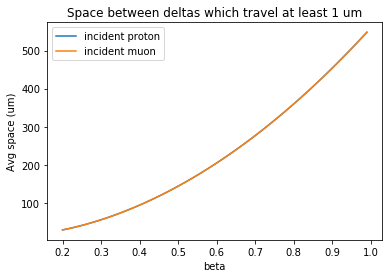

In [7]:
beta = np.linspace(0.2,0.99)
gamma = 1/np.sqrt(1-beta**2)

wmax = (2*0.511*beta**2*gamma**2) / (1 + 2*gamma/1836 + (1/1836)**2)
wmax_m = (2*0.511*beta**2*gamma**2) / (1 + 2*gamma/205 + (1/205)**2)

perum = 0.178872/(1e4 * beta**2) * (1/0.01 - 1/wmax)
perum_m = 0.178872/(1e4 * beta**2) * (1/0.01 - 1/wmax_m)

plt.plot(beta,1/perum, label='incident proton')
plt.plot(beta,1/perum_m, label='incident muon')
plt.xlabel('beta')
plt.ylabel('Avg space (um)')
plt.title('Space between deltas which travel at least 1 um')
plt.legend()